<a href="https://colab.research.google.com/github/jonathandsouza/jy-notebooks/blob/main/MLP1_2_Linear_regression_(advanced).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set()
%matplotlib inline 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor

#More training on Linear Regression

Let's do some more (simple) linear modeling.

Below we generate random data to fit our model to, and take a look using a scatter plot.

                x
count  100.000000
mean     0.552823
std      0.275369
min      0.017764
25%      0.324664
50%      0.597950
75%      0.779780
max      0.988640
          x
0  0.232849
1  0.269973
2  0.593915
3  0.609948
4  0.816863
                x       label
count  100.000000  100.000000
mean     0.552823    5.946206
std      0.275369    1.715412
min      0.017764    1.884426
25%      0.324664    4.829839
50%      0.597950    6.103377
75%      0.779780    7.003128
max      0.988640    9.552255
          x     label
0  0.232849  5.040162
1  0.269973  4.340765
2  0.593915  7.746442
3  0.609948  5.761424
4  0.816863  7.760353


<Axes: xlabel='x', ylabel='label'>

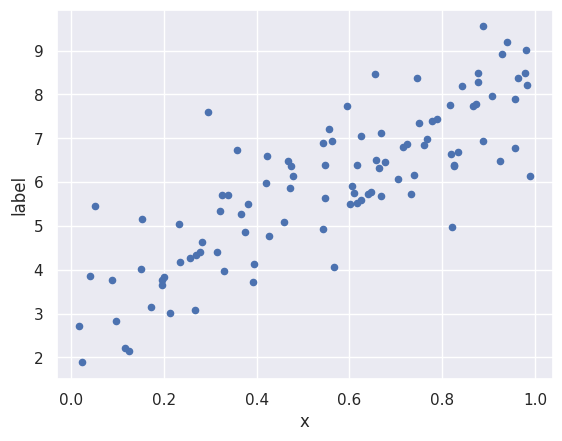

In [8]:
a0 = 3
a1 = 5.2
n_samples = 100

df = pd.DataFrame(np.random.random(n_samples), columns=["x"])

print(df.describe());
print(df.head());

df['label'] = 3 + a1*df.x + np.random.randn(n_samples) # y = a0 + a1*x + noise

print(df.describe());
print(df.head());

df.plot.scatter(x="x", y="label")

This time we are sure our data meets the linear assumptions (because we generated it that way):
* There is a linear relation
* No outliers
* No collinearity (just one feature)
* Normal distribution

For the sake of practice, let's run through the steps again.

In [ ]:
# Seperating feature and target
X = df.drop("label", axis=1)
y = df.label

# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

# Fit model
reg = LinearRegression()
reg.fit(X_train, y_train)

Let's take a deeper look in what the model has actually learned. To do this we look at the intercept (constant) and the coefficient (slope of the line).



In [ ]:
print(reg.intercept_)
print(reg.coef_)

So the fitted function we have derived from using the train-dataset is:

                                ŷ = 2.66 + 5.96(x)
                                
If x is zero, our predicted y-value is 2.66. And for every increase of x by 1 our predicted y-value increases by 5.96.

In [ ]:
# Predict based on the fitted model
y_pred = reg.predict(X_test)
y_pred

In [ ]:
# Evaluate model using performance metrics
print("RMSE",mean_squared_error(y_test,y_pred, squared=False))
print("MAE",mean_absolute_error(y_test,y_pred))
print("R2",r2_score(y_test,y_pred))

In [ ]:
# Performance score of always using mean-value
dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

print("RMSE",mean_squared_error(y_test,dummy_pred, squared=False))

#Visualising the model

Let's use matplotlib to visualize our linear regression model.

For every possible input, we want to see the prediction that the model makes. We first generate a number of possible x values. Then we let the model make predictions. And then we plot the input and the output in a visualization.

In [ ]:
df_modelvisual = pd.DataFrame(np.arange(df.x.min(), df.x.max(), 0.01), columns=["x"])
df_modelvisual["prediction"] = reg.predict(df_modelvisual)
ax = df.plot.scatter(x="x", y="label")
df_modelvisual.plot(x="x", y="prediction", ax=ax, c="red")

This indeed resembles what we saw in our fitted function. The line starts at (x=0, y=2.66) and ends at (x=1, y = 2.66 + 5.96 = 8.62).

#Assignment 1.2

Now that we fully understand Simple Linear Regression, we go back to Multiple Linear Regression. This is basically the same, just using multiple independent variables instead of one (like we did in the first homework assignment already).

Again the model calculates an intercept, and in this case multiple coefficients. Each corresponding to the impact of the specific feature to the predicted value of y.


We are going to work with a housing dataset again, this time from Ames. Again we train and evaluate a Linear Regression model, but this time we are going to take into account the conditions for making a good LR-model.

In [ ]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)

In [ ]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target
df.head()

If you want a description of the dataset, and the meaning of the columns, print housing.DESCR: `print(housing.DESCR)`

**Question 1:**
* explore the dataset, clean up if necessary
* check which features have a relationship with the target, and go on using only those features (tip: use [correlation matrix](https://www.google.com/search?q=correlation+matrix+python&client=firefox-b-d&sxsrf=ALiCzsY50AE5OoOVOqD-NNsyS48H-IzXQQ%3A1666088872474&ei=qH9OY-G-HIf9kwWUrIr4Bw&ved=0ahUKEwjhsqHbyOn6AhWH_qQKHRSWAn8Q4dUDCA4&uact=5&oq=correlation+matrix+python&gs_lcp=Cgdnd3Mtd2l6EAMyCAgAEIAEEMsBMgUIABCABDIICAAQgAQQywEyCAgAEIAEEMsBMggIABCABBDLATIICAAQgAQQywEyCAgAEIAEEMsBMggIABCABBDLATIICAAQgAQQywEyCAgAEIAEEMsBOgoIABBHENYEELADOgcIABCwAxBDOg0IABDkAhDWBBCwAxgBSgQITRgBSgQIQRgASgQIRhgBUJcEWNcKYOILaAFwAXgAgAE7iAH0ApIBATeYAQCgAQHIARHAAQHaAQYIARABGAk&sclient=gws-wiz))
* check the distribution of the variables (are they Gaussian?) (tip: use [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)), if necessary adjust the distribution (tip: [log-transform](https://www.geeksforgeeks.org/numpy-log-python/))
* find out if the relationship with the target is linear
* train and evaluate a regression model on your selected features (use a baseline as comparison)
* look at the coefficients for each feature. What do we make out of this?